<a href="https://colab.research.google.com/github/drozzel/Portfolio/blob/main/NLP_with_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reuters Dataset

The Reuters Dataset is another well-known machine learning dataset. The dataset consists of text from the Reuters newswire in 1987. We will use a subset of the data that contain texts from eight topics:



Class | 	# train docs |	# test docs	| Total # docs
:--- | --: | --: | --:
acq |	1596	| 696	| 2292
crude | 	253 | 	121 |	374
earn	| 2840	| 1083	| 3923
grain	|41 | 	10 | 	51
interest | 	190	| 81	| 271
money-fx	| 206	| 87	| 293
ship	| 108	| 36	| 144
trade	| 251	| 75	| 326
Total	| 5485 |	2189	| 7674

The training dataset is http://zacharski.org/files/courses/cs419/r8-train-all-terms.txt

The test dataset is http://zacharski.org/files/courses/cs419/r8-test-all-terms.txt

Can you build a network that will classify texts into one of 8 categories?


#Notebook Summary
## Natural Language Processing Project
This notebook is based on the assignment given to me in my Machine Learning class. 
Here we were given a subset of the Reuters Dataset and were told to create a network to classify 8 categories. The original dataset contains 46 different categories.

### Original Assignment - 8 Category Reuters Dataset
1. Import the necessary libraries
2. Read in the dataset
3. Clean and organize the data
4. Create the tokenizer/ One hot encode labels
5. Create and fit the network
6. Plot the accuracy/loss chart
7. Evaluate the network against the test data

# 1. Import the Necessary Libraries

In [44]:
#data reading
import pandas as pd

#One hot encoding/model creation
from keras.preprocessing.text import Tokenizer
import keras
from tensorflow.keras import optimizers
from keras import models
from keras import layers

#data visualization
import matplotlib.pyplot as plt

# 2. Read in the Dataset

In [45]:
#Obtain the files
!wget http://zacharski.org/files/courses/cs419/r8-train-all-terms.txt
!wget http://zacharski.org/files/courses/cs419/r8-test-all-terms.txt
!ls

--2021-10-17 18:43:46--  http://zacharski.org/files/courses/cs419/r8-train-all-terms.txt
Resolving zacharski.org (zacharski.org)... 198.199.65.227
Connecting to zacharski.org (zacharski.org)|198.199.65.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3354435 (3.2M) [text/plain]
Saving to: ‘r8-train-all-terms.txt.1’

r8-train-all-terms. 100%[===================>]   3.20M  20.8MB/s    in 0.2s    

2021-10-17 18:43:46 (20.8 MB/s) - ‘r8-train-all-terms.txt.1’ saved [3354435/3354435]

--2021-10-17 18:43:46--  http://zacharski.org/files/courses/cs419/r8-test-all-terms.txt
Resolving zacharski.org (zacharski.org)... 198.199.65.227
Connecting to zacharski.org (zacharski.org)|198.199.65.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195272 (1.1M) [text/plain]
Saving to: ‘r8-test-all-terms.txt.1’

r8-test-all-terms.t 100%[===================>]   1.14M  --.-KB/s    in 0.1s    

2021-10-17 18:43:46 (10.4 MB/s) - ‘r8-test-all-terms.txt.1’ sa

In [46]:
#Read in the files
r8train = pd.read_csv('r8-train-all-terms.txt', sep='\t')
r8test = pd.read_csv('r8-test-all-terms.txt', sep='\t')

# 3. Clean and Organize the Data
Since this a commonly used dataset there is no cleaning to be done however we will look at the dataset to see the columns upon which we split for the labels and features for our network.


In [47]:
#Get a view of the dataset
print(r8train.head())

#Create Labels and Text
r8train_labels = r8train['class']
r8train_text = r8train.text
r8test_labels = r8test['class']
r8test_text = r8test.text


  class                                               text
0  earn  champion products ch approves stock split cham...
1   acq  computer terminal systems cpml completes sale ...
2  earn  cobanco inc cbco year net shr cts vs dlrs net ...
3  earn  am international inc am nd qtr jan oper shr lo...
4  earn  brown forman inc bfd th qtr net shr one dlr vs...


In [48]:
#Get an overview of the number of samples
print('# of Training Samples: {}'.format(len(r8train_text)))
print('# of Test Samples: {}'.format(len(r8test_text)))

num_classes= len(r8train_labels.unique())
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 5485
# of Test Samples: 2189
# of Classes: 8


# 4. Create the Tokenizer/ One Hot Encode Labels
In this step we utilized pandas get dummy functions to one hot encode the labels. This helps when training the model as it creates a numerical representation of the columns in a manner that does not create a bias of order such as 1,2,3. Instead it creates an array of 8 columns representing the features for each row in which the value of 1 is placed in the correct category and all other values are 0.


In [49]:
#one hot encode categorical labels
r8train_labels = pd.get_dummies(r8train_labels)
r8test_labels = pd.get_dummies(r8test_labels)

#get tokenizer for text
max_words = 10000
tokenizerTrain = Tokenizer(num_words=max_words)
tokenizerTrain.fit_on_texts(r8train_text)
tokenizerTest = Tokenizer(num_words=max_words)
tokenizerTest.fit_on_texts(r8test_text)

# Directly get the one-hot binary representations for test and train
one_hot_train_results = tokenizerTrain.texts_to_matrix(r8train_text, mode='tfidf')
one_hot_test_results = tokenizerTest.texts_to_matrix(r8test_text,mode = 'tfidf')

#Take a peek
print(one_hot_train_results[0])
print(one_hot_train_results.shape)
print(r8train_labels)

[0.         2.1239325  2.16894167 ... 0.         0.         0.        ]
(5485, 10000)
      acq  crude  earn  grain  interest  money-fx  ship  trade
0       0      0     1      0         0         0     0      0
1       1      0     0      0         0         0     0      0
2       0      0     1      0         0         0     0      0
3       0      0     1      0         0         0     0      0
4       0      0     1      0         0         0     0      0
...   ...    ...   ...    ...       ...       ...   ...    ...
5480    0      0     1      0         0         0     0      0
5481    0      0     0      0         0         1     0      0
5482    0      0     1      0         0         0     0      0
5483    0      0     0      0         0         1     0      0
5484    0      0     0      0         0         0     1      0

[5485 rows x 8 columns]


#5.Create and Fit the Network
Some important things to note since we are training our model to predict from a slew of categories and not simply is it black or white we will use 'softmax' in the final layer and our loss will be 'categorical_crossentropy'. The optimizer we will use is 'adam' as it often has better results than RMSprop when doing NLP.

In [50]:
#build a model
r8network = models.Sequential()
r8network.add(layers.Dense(512, activation='relu', input_shape=(max_words,)))
r8network.add(layers.Dropout(0.5))
r8network.add(layers.Dense(8,activation ='softmax'))



#compile the model
r8network.compile(optimizer= 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#fit the model
r8history = r8network.fit(
      one_hot_train_results, r8train_labels,
      batch_size = 32,
      epochs=20,
      validation_split=0.3,
      validation_steps=50)

Epoch 1/20
120/120 [==============================] - 5s 39ms/step - loss: 0.3445 - accuracy: 0.9146 - val_loss: 0.2104 - val_accuracy: 0.9506
Epoch 2/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0232 - accuracy: 0.9953 - val_loss: 0.2046 - val_accuracy: 0.9525
Epoch 3/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.2130 - val_accuracy: 0.9513
Epoch 4/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.2239 - val_accuracy: 0.9506
Epoch 5/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.2425 - val_accuracy: 0.9525
Epoch 6/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0034 - accuracy: 0.9984 - val_loss: 0.2356 - val_accuracy: 0.9494
Epoch 7/20
120/120 [==============================] - 4s 37ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.2575 - val_accuracy: 0.9481

#6. Plot the Network Accuracy and Loss


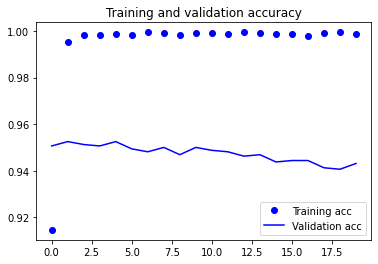

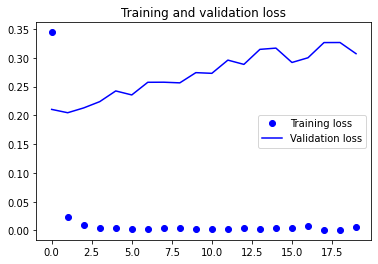

In [51]:
acc = r8history.history['accuracy']
val_acc = r8history.history['val_accuracy']
loss = r8history.history['loss']
val_loss = r8history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Here we can see that there is overfitting present in the model, as the training accuracy lies above the validation accuracy by a significant margin. While the training loss lies below the validation loss by a significant margin.

#7. Evaluate the Network Against the Test Data

In [52]:
scoreSeg = r8network.evaluate(one_hot_test_results, r8test_labels)
print("Accuracy: ", scoreSeg[1])

69/69 [==============================] - 1s 12ms/step - loss: 6.7163 - accuracy: 0.3495
Accuracy:  0.34947463870048523


Of course creating a model with such a low accuracy is not very satisfying. However, this was the extent of the assignment. This highlights that because of the small amount of data being utilized and trying to categorize into 8 categories we needed more data.

In order for me to get a better understanding I created another model seperate from the assignment utilizing the full Reuters dataset.


#1. Import the Reuters Dataset from Keras
Luckily Keras already has the Reuters dataset available we simply need to import it. When this is imported it is important to note that the text data comes in as a numerical index we can convert the indicies back to words with the get_word_index() function.

In [53]:
from keras.datasets import reuters
import numpy as np
(train_text, train_labels), (test_text, test_labels) = reuters.load_data(num_words=None, test_split= 0.2)
word_index = reuters.get_word_index()

#2. View the Data
Its important to get a basic overview of the data in order to create an effective model.

In [54]:
print('# of Training Samples: {}'.format(len(train_text)))
print('# of Test Samples: {}'.format(len(test_text)))

num_classes= len(np.unique(train_labels))
print('# of Classes: {}'.format(num_classes))

# of Training Samples: 8982
# of Test Samples: 2246
# of Classes: 46


#3. Organize and Clean the Data

As mentioned before the text data is stored as an index that correlates to their rank of frequency within the corpus, it looks like so.


In [55]:
print(train_text[0])
print(test_text[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

What we would like to do is convert these indicies back into words. This is done by flipping the values within the dictionary word_index.

In [56]:
#create an empty dictionary to fill with values
index_to_word = {}

#iterate through the word index and flip the key, value pair for the index_to_word dict
for key, value in word_index.items():
  #this line is taking the value or the word and making it the key and setting the given value as the key or index.
  index_to_word[value] = key

#Take word 1 and show.
print(index_to_word[1])
print(word_index['the'])

the
1


Now when given the index value it will return a word instead of giving it a word and receiving the index.


#4.Create the Tokenizer/One-Hot-Encode the Labels

In [57]:
#Create a new variable for max words, I used r46 to highlight this is the Reuters dataset with 46 categories.
r46max_words = 10000

tokenizer = Tokenizer(num_words=r46max_words)
train_text = tokenizer.sequences_to_matrix(train_text, mode = 'binary')
test_text = tokenizer.sequences_to_matrix(test_text, mode = 'binary')

train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)

In [58]:
#Take a peek
print(train_text.shape)
print(test_text.shape)

print(train_labels.shape)
print(train_labels[0])

(8982, 10000)
(2246, 10000)
(8982, 46)
0       0
1       0
2       0
3       0
4       0
       ..
8977    0
8978    0
8979    0
8980    0
8981    0
Name: 0, Length: 8982, dtype: uint8


#5.Build and Fit the Model

In [59]:
#build a model
r46network = models.Sequential()
r46network.add(layers.Dense(512, activation='relu', input_shape=(r46max_words,)))
r46network.add(layers.Dropout(0.5))
r46network.add(layers.Dense(46,activation ='softmax'))



#compile the model
r46network.compile(optimizer= 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#fit the model
r46history = r46network.fit(
      train_text, train_labels,
      batch_size = 512,
      epochs=20,
      validation_split=0.1)

Epoch 1/20
16/16 [==============================] - 4s 231ms/step - loss: 2.4057 - accuracy: 0.5293 - val_loss: 1.6185 - val_accuracy: 0.6852
Epoch 2/20
16/16 [==============================] - 3s 216ms/step - loss: 1.1803 - accuracy: 0.7560 - val_loss: 1.1808 - val_accuracy: 0.7531
Epoch 3/20
16/16 [==============================] - 3s 211ms/step - loss: 0.7807 - accuracy: 0.8352 - val_loss: 1.0119 - val_accuracy: 0.7875
Epoch 4/20
16/16 [==============================] - 3s 213ms/step - loss: 0.5505 - accuracy: 0.8879 - val_loss: 0.9245 - val_accuracy: 0.7998
Epoch 5/20
16/16 [==============================] - 3s 213ms/step - loss: 0.3962 - accuracy: 0.9198 - val_loss: 0.8911 - val_accuracy: 0.8109
Epoch 6/20
16/16 [==============================] - 3s 213ms/step - loss: 0.3093 - accuracy: 0.9352 - val_loss: 0.8694 - val_accuracy: 0.8131
Epoch 7/20
16/16 [==============================] - 3s 213ms/step - loss: 0.2449 - accuracy: 0.9452 - val_loss: 0.8702 - val_accuracy: 0.8120
Epoch 

#6.Plot the Accuracy/Loss of the Model

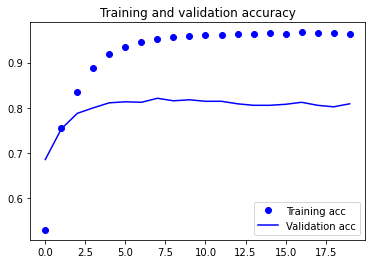

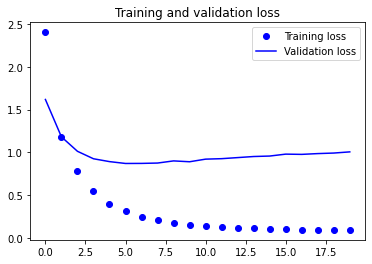

In [60]:
acc = r46history.history['accuracy']
val_acc = r46history.history['val_accuracy']
loss = r46history.history['loss']
val_loss = r46history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#7.Evaluate the Model

In [61]:
scoreSeg46 = r46network.evaluate(test_text, test_labels)
print("Accuracy: ", scoreSeg46[1])

71/71 [==============================] - 1s 12ms/step - loss: 0.9763 - accuracy: 0.8045
Accuracy:  0.8045414090156555
